# Problem Statement
### Use decision tree algorithm to predict whether a mushroom sample is poisonous or edible

In [58]:
import pandas as pd

In [59]:
df=pd.read_csv('mushroom.csv')

In [60]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [61]:
df.shape

(8124, 23)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [63]:
df.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [64]:
df.type.replace({'e':1,'p':0},inplace=True)

In [65]:
for cols in df.columns:
    if df[cols].dtype =='object':
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[cols]=le.fit_transform(df[cols])

In [66]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,1,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,1,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,0,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,1,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [67]:
df.corr()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
type,1.000000,-0.052951,-0.178446,0.031384,0.501530,0.093552,-0.129200,0.348387,-0.540024,0.530566,...,0.298801,0.154003,0.146730,NaN,-0.145142,0.214366,0.411771,-0.171961,-0.298686,-0.217179
cap_shape,-0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,-0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,-0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,-0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

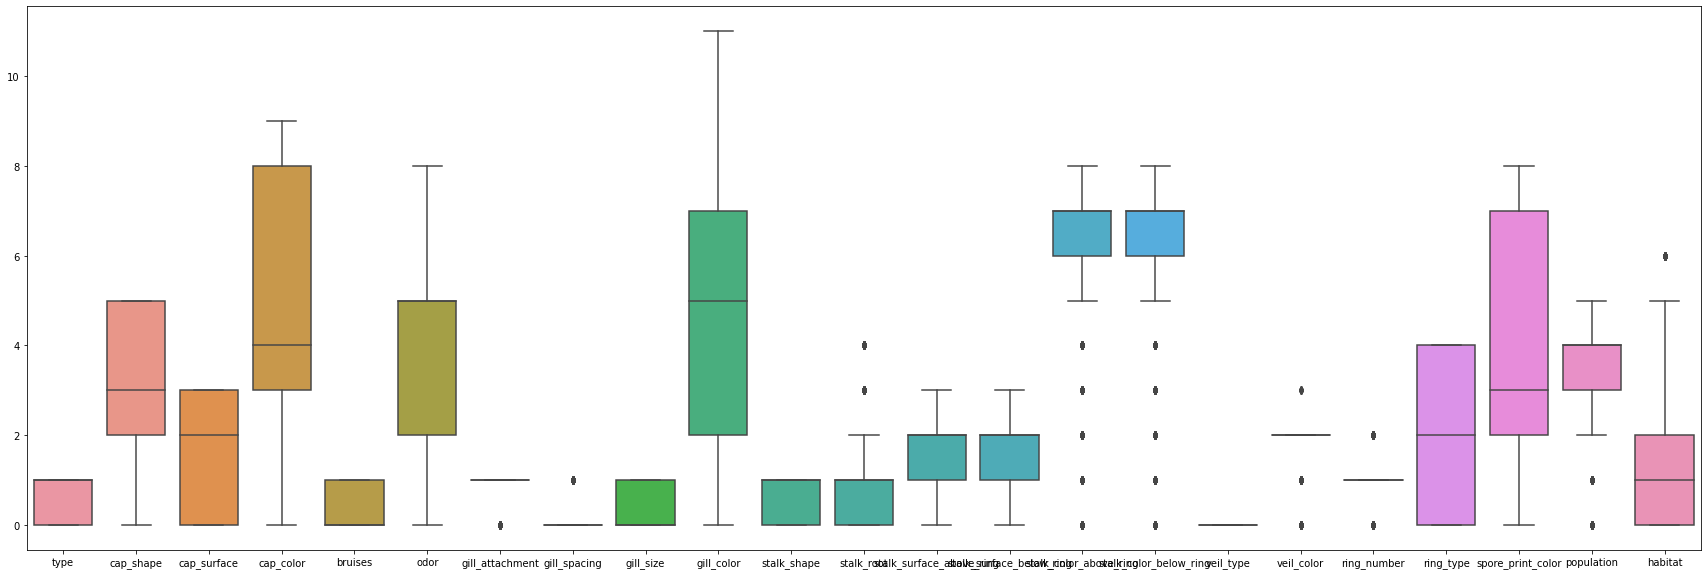

In [69]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df)
plt.show();

In [70]:
X=df.drop('type',axis=1)
y=df['type']


##  Data Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler=StandardScaler()
scaler.fit(X)
scaled=scaler.transform(X)

## Train Test Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2)

In [75]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (6499, 22)
X_test (1625, 22)
y_train (6499,)
y_test (1625,)


# Import The Algorithm

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr=LogisticRegression()
lr

LogisticRegression()

In [78]:
lr.fit(X_train,y_train)

LogisticRegression()

In [79]:
pred=lr.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Performance Measure

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
con_lr=confusion_matrix(y_test,pred)
con_lr

array([[725,  39],
       [ 32, 829]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_test,pred)

0.9563076923076923

In [84]:
result=metrics.classification_report(y_test,pred)
print(result)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       764
           1       0.96      0.96      0.96       861

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [85]:
from sklearn.metrics import roc_curve

In [86]:
pred_prob= lr.predict_proba(X_test)

In [87]:
fpr, tpr, thereshold=roc_curve(y_test, pred_prob[:,1])

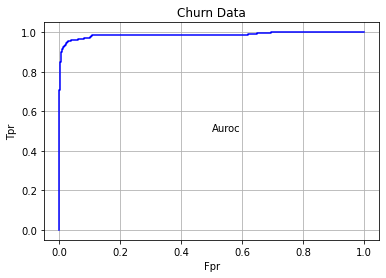

In [88]:
plt.plot(fpr,tpr, color='b')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('Churn Data')
plt.grid()
plt.text(x=.5,y=.5, s='Auroc');

# Decission Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

## Ginni Score

In [90]:
dtc= DecisionTreeClassifier(criterion='gini',max_depth=3,)
dtc

DecisionTreeClassifier(max_depth=3)

In [91]:
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [92]:
print('Accuracy Score on train data(using Default criterionas gini): ',accuracy_score(y_true=y_train,y_pred=dtc.predict(X_train)))
print('Accuracy Score on test data(using Default criterionas gini): ',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy Score on train data(using Default criterionas gini):  0.9578396676411756
Accuracy Score on test data(using Default criterionas gini):  0.9618461538461538


## Entropy

In [93]:
dtc_e=DecisionTreeClassifier( criterion='entropy',max_depth=3)

In [94]:
dtc_e.fit(X_train,y_train)
y_pred=dtc_e.predict(X_test)

In [95]:
print('Accuracy Score on train data(using Entropy: ',accuracy_score(y_true=y_train,y_pred=dtc_e.predict(X_train)))
print('Accuracy Score on test data(using Entropy): ',accuracy_score(y_true=y_test,y_pred=y_pred))

Accuracy Score on train data(using Entropy:  0.9564548392060317
Accuracy Score on test data(using Entropy):  0.96


In [96]:
result=metrics.classification_report(y_test,y_pred)
print(result)

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       764
           1       0.97      0.96      0.96       861

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rnf=RandomForestClassifier(n_estimators=50,max_depth=3, criterion='gini')

In [99]:
rnf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [100]:
rnf.score(X_train,y_train)

0.9818433605170026

In [101]:
rnf.score(X_test,y_test)

0.9778461538461538